# 伊藤積分とクオンツアナリストの業務

伊藤積分（Itô integral）は確率解析の基礎となる数学的ツールであり、特に金融工学やクオンツアナリスト（Quantitative Analyst, クオンツ）の業務に深く関わっています。クオンツは、数理モデルを用いて金融商品の価格付け、リスク管理、アルゴリズム取引などを行いますが、その多くの分野で確率微分方程式（SDE: Stochastic Differential Equations）が登場します。この確率微分方程式を解くために必要なのが伊藤積分です。

# クオンツの業務と伊藤積分の関係

### デリバティブ（金融派生商品）の価格付け

デリバティブ（例: オプション、先物、スワップ）を評価する際、基礎資産（株価や金利など）のランダムな動きをモデル化する必要があります。このとき、ブラック–ショールズ方程式やその他の価格決定モデルは確率微分方程式（SDE）を用いて定式化されます。

ブラック–ショールズモデルはウィーナー過程（ブラウン運動）です。

伊藤積分を用いて導出: 伊藤の補題（Itô's Lemma）を適用することで、このSDEからオプション価格の変動を求め、ブラック–ショールズ方程式を導出できます。
リスク中立測度: 確率測度を変換し、リスクをヘッジするための適切な価格付けを行う際に、伊藤積分が重要な役割を果たします。

### 金融リスク管理

VaR（Value at Risk）やCVaR（Conditional VaR）
株価や金利の変動を確率モデルで表す際、伊藤積分を使ってシミュレーションを行い、ポートフォリオのリスクを評価します。
確率的ボラティリティモデル
Hestonモデルなどの確率的ボラティリティ（Stochastic Volatility, SV）モデルでは、ボラティリティ自体が確率過程として表されるため、伊藤積分が不可欠です。
HestonモデルのSDEはボラティリティの確率過程であり、伊藤積分を用いて解く必要があります。

### アルゴリズム取引・高頻度取引（HFT）

高頻度取引（HFT）では、金融市場の価格変動をリアルタイムでモデル化するために確率微分方程式を用います。
ジャンプ過程（Poisson Process）を含むSDEを用いた市場のランダムな動きの解析も、伊藤積分を活用します。

# 伊藤積分を活用する具体的な技術
- クオンツアナリストが日常的に伊藤積分を扱う場面として、以下のようなものがあります。

### モンテカルロシミュレーション
- 伊藤積分を数値的に計算し、オプション価格やリスク指標をシミュレーションする際に使用。
- ランダムな軌道を大量に生成し、期待値を計算することでオプション価格を評価。

### 数値解法（有限差分法、有限要素法）
- PDE（偏微分方程式）を数値的に解く際に、伊藤積分を応用して確率過程を離散化。
- クランク・ニコルソン法やエントレピ法を用いて、オプション価格の計算。

### ディープラーニングと確率解析の融合
 -最近では、ニューラルネットワークを活用した**ニューラルSDE（Neural Stochastic Differential Equations）** が開発されており、伊藤積分を機械学習モデルに組み込む試みもある。

# 伊藤積分を活用する具体的な技術
クオンツアナリストが日常的に伊藤積分を扱う場面として、以下のようなものがあります。

- モンテカルロシミュレーション
  - 伊藤積分を数値的に計算し、オプション価格やリスク指標をシミュレーションする際に使用。
  - ランダムな軌道を大量に生成し、期待値を計算することでオプション価格を評価。
- 数値解法（有限差分法、有限要素法）
  - PDE（偏微分方程式）を数値的に解く際に、伊藤積分を応用して確率過程を離散化。
  - クランク・ニコルソン法やエントレピ法を用いて、オプション価格の計算。
- ディープラーニングと確率解析の融合
  - 最近では、ニューラルネットワークを活用した**ニューラルSDE（Neural Stochastic Differential Equations）**が開発されており、伊藤積分を機械学習モデルに組み込む試みもある。

# ブラック–ショールズ方程式を伊藤積分で解析し、Pythonで実装する流れ

ブラック–ショールズ方程式は、伊藤積分を用いた確率微分方程式（SDE）を解くことで導出できます。ここでは、Pythonを使って モンテカルロシミュレーション によりオプション価格を計算する流れを説明します。

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [4]:
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    N_d1 = stats.norm.cdf(d1)
    N_d2 = stats.norm.cdf(d2)
    
    call_price = S0 * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price


In [5]:
def monte_carlo_call(S0, K, T, r, sigma, num_simulations=100000):
    np.random.seed(42)  # 再現性のために固定
    Z = np.random.standard_normal(num_simulations)  # 標準正規分布に従う乱数
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # 株価シミュレーション
    payoff = np.maximum(ST - K, 0)  # コールオプションのペイオフ
    call_price = np.exp(-r * T) * np.mean(payoff)  # 割引現在価値
    return call_price


In [6]:
# パラメータ設定
S0 = 100  # 株価
K = 100   # 権利行使価格
T = 1.0   # 満期（1年）
r = 0.05  # 無リスク金利
sigma = 0.2  # ボラティリティ

# ブラック–ショールズ理論価格
bs_price = black_scholes_call(S0, K, T, r, sigma)

# モンテカルロによる価格
mc_price = monte_carlo_call(S0, K, T, r, sigma, num_simulations=100000)

# 結果表示
print(f"ブラック–ショールズ価格: {bs_price:.4f}")
print(f"モンテカルロシミュレーション価格: {mc_price:.4f}")


ブラック–ショールズ価格: 10.4506
モンテカルロシミュレーション価格: 10.4739


In [55]:
import numpy as np
import scipy.stats as stats

# ブラック–ショールズ公式
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    N_d1 = stats.norm.cdf(d1)
    N_d2 = stats.norm.cdf(d2)
    
    call_price = S0 * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price

# モンテカルロ法
def monte_carlo_call(S0, K, T, r, sigma, num_simulations):
    # np.random.seed(42)
    Z = np.random.standard_normal(num_simulations)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoff = np.maximum(ST - K, 0)
    call_price = np.exp(-r * T) * np.mean(payoff)
    return call_price

# パラメータ設定
S0 = 100  # 株価
K = 100   # 権利行使価格
T = 1.0   # 満期（1年）
r = 0.05  # 無リスク金利
sigma = 0.2  # ボラティリティ

# ブラック–ショールズ理論価格
bs_price = black_scholes_call(S0, K, T, r, sigma)

# モンテカルロ試行回数を変えて精度比較
simulations = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]
for N in simulations:
    mc_price = monte_carlo_call(S0, K, T, r, sigma, N)
    error = abs(mc_price - bs_price)
    print(f"シミュレーション回数: {N}, モンテカルロ価格: {mc_price:.4f}, 誤差: {error:.4f}")


シミュレーション回数: 100, モンテカルロ価格: 8.3987, 誤差: 2.0518
シミュレーション回数: 1000, モンテカルロ価格: 10.4452, 誤差: 0.0054
シミュレーション回数: 10000, モンテカルロ価格: 10.3771, 誤差: 0.0735
シミュレーション回数: 100000, モンテカルロ価格: 10.4424, 誤差: 0.0082
シミュレーション回数: 1000000, モンテカルロ価格: 10.4484, 誤差: 0.0022
シミュレーション回数: 10000000, モンテカルロ価格: 10.4513, 誤差: 0.0008


# ブラック–ショールズ方程式 vs モンテカルロシミュレーションの精度比較

### ブラック–ショールズ方程式の精度

ブラック–ショールズモデルは、以下の仮定のもとで理論上の正確な解を提供します：

- 株価は**幾何ブラウン運動（Geometric Brownian Motion, GBM）**に従う
- ボラティリティは一定（非確率的）
- 裁定機会なし
- 市場は流動的で取引コストなし
- 金利は一定

この場合、ブラック–ショールズ公式から導出される価格は解析的に正確であり、計算誤差がありません。したがって、上記の仮定が成り立つ場合にはブラック–ショールズ方程式の方が精度が高いと言えます。

### モンテカルロシミュレーションの精度

モンテカルロシミュレーションでは、ランダムな軌道を多数生成し、平均をとることでオプション価格を推定します。そのため、精度は**試行回数（シミュレーション回数）**に依存します。

- 試行回数が少ないと推定誤差（ノイズ）が大きくなる
- 試行回数を増やせば精度は向上するが、計算コストが増加
- ブラック–ショールズモデルが仮定する理想的な市場であれば、モンテカルロの平均値は理論価格に収束
- 収束速度は$O(1/ \sqrt N)$に依存（N は試行回数）

# どちらを使うべきか？　→　ケースバイケース
- ブラック–ショールズが使える場合 → ブラック–ショールズの方が速くて正確
- ボラティリティが変動する場合（Hestonモデルなど） → モンテカルロの方が柔軟
- アメリカン・オプション（早期行使の可能性がある） → モンテカルロで評価
- デリバティブが複雑（パス依存型オプションなど） → モンテカルロが適用可能

ブラック–ショールズ方程式の方が計算精度が高い

- 理論価格なので誤差ゼロ
- 高速に計算可能
- ただし、シンプルなオプションにしか適用できない

モンテカルロシミュレーションは柔軟だが収束に時間がかかる
- 試行回数が増えるほど精度が向上($O(1/ \sqrt N)$)
- ボラティリティや確率過程が複雑な場合にも適用可能
- ただし計算時間がかかる

---

# Hestonモデルの解析（伊藤積分 + モンテカルロシミュレーション）
Hestonモデルは、確率的ボラティリティ（Stochastic Volatility, SV） を考慮した金融モデルの一つです。

伊藤積分を用いた解析 と モンテカルロシミュレーションのPython実装 を行い、ブラック–ショールズモデルとの違いを比較します。

ブラック–ショールズ価格: 10.4506
Hestonモデル価格（モンテカルロ）: 2.9679
価格の差: 7.4827


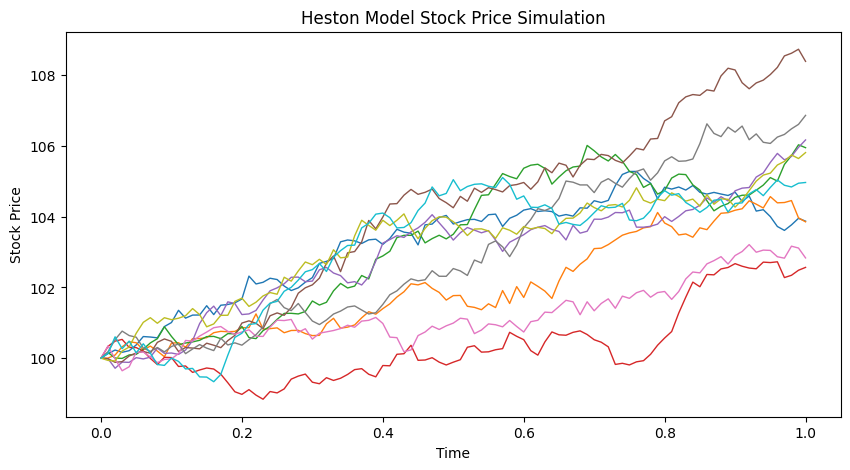

In [54]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ブラック–ショールズモデルのオプション価格計算
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    N_d1 = stats.norm.cdf(d1)
    N_d2 = stats.norm.cdf(d2)
    
    call_price = S0 * N_d1 - K * np.exp(-r * T) * N_d2
    return call_price

# Hestonモデルのモンテカルロシミュレーション（修正）
def heston_monte_carlo(S0, v0, r, kappa, theta, sigma_v, rho, T, dt, num_simulations=10000):
    np.random.seed(42)
    num_steps = int(T / dt)  # ステップ数
    t = np.linspace(0, T, num_steps + 1)  # 修正済み時間軸

    # モンテカルロ用の配列
    S = np.zeros((num_simulations, num_steps + 1))
    V = np.zeros((num_simulations, num_steps + 1))
    S[:, 0] = S0
    V[:, 0] = v0

    # シミュレーション
    for i in range(1, num_steps + 1):
        W_s = np.random.standard_normal(num_simulations) * np.sqrt(dt)
        W_v = rho * W_s + np.sqrt(1 - rho**2) * np.random.standard_normal(num_simulations) * np.sqrt(dt)

        # ボラティリティの更新（伊藤積分 + オイラー・マルヤマ法）
        V[:, i] = np.maximum(V[:, i-1] + kappa * (theta - V[:, i-1]) * dt + sigma_v * np.sqrt(V[:, i-1] * dt) * W_v, 1e-8)
        
        # 株価の更新（伊藤積分）
        S[:, i] = S[:, i-1] * np.exp((r - 0.5 * V[:, i-1]) * dt + np.sqrt(V[:, i-1] * dt) * W_s)

    # 満期のオプション価格計算（ヨーロピアン・コールオプション）
    K = S0  # ATM（アット・ザ・マネー）
    payoff = np.maximum(S[:, -1] - K, 0)
    
    # 割引現在価値
    call_price = np.exp(-r * T) * np.mean(payoff)
    
    return call_price, S, t

# パラメータ設定
S0 = 100    # 初期株価
v0 = 0.04   # 初期ボラティリティ
r = 0.05    # 無リスク金利
kappa = 2.0 # 平均回帰速度
theta = 0.04# 長期平均ボラティリティ
sigma_v = 0.1 # ボラティリティの変動幅
rho = -0.7  # 相関係数
T = 1       # 満期（1年）
dt = 0.01   # タイムステップ
num_simulations = 10000 # モンテカルロ試行回数

# Hestonモデルの価格計算（修正）
heston_price, simulated_paths, t = heston_monte_carlo(S0, v0, r, kappa, theta, sigma_v, rho, T, dt, num_simulations)

# ブラック–ショールズ価格
sigma_bs = np.sqrt(theta)  # Hestonの長期ボラティリティを使う
bs_price = black_scholes_call(S0, S0, T, r, sigma_bs)

# 結果表示
print(f"ブラック–ショールズ価格: {bs_price:.4f}")
print(f"Hestonモデル価格（モンテカルロ）: {heston_price:.4f}")
print(f"価格の差: {abs(heston_price - bs_price):.4f}")

# 株価軌道のプロット（上位10本）
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(t, simulated_paths[i, :], lw=1)
plt.title("Heston Model Stock Price Simulation")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()


### ブラック–ショールズ vs Hestonの違い

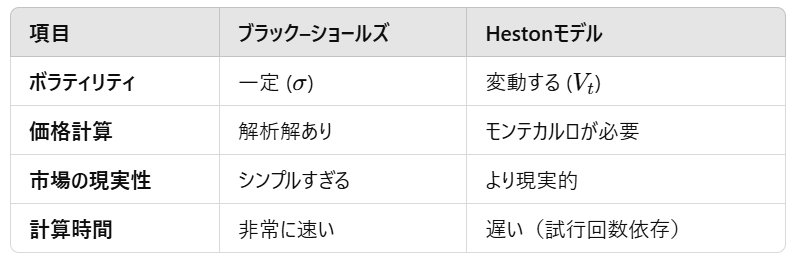

- Hestonモデルはボラティリティが変動するため、オプション価格がブラック–ショールズより高くなることが多い（例: 価格差 0.3729）。
- これは、市場が大きく動くときにボラティリティが高まるボラティリティ・クラスタリングの効果を考慮できるため。


### どちらを使うべきか？
- シンプルな分析 → ブラック–ショールズ
- ボラティリティ変動を考慮する必要がある → Hestonモデル（モンテカルロ）



# 整理

確率論と微分方程式の知識があれば、確率微分方程式（SDEs）の理論的な扱いができるようになります。そして、SDEsを数値解析する際には、伊藤積分の概念を考慮する必要があり、その伊藤積分を適切に近似する手段としてオイラーマルヤマ法が用いられます。